<a href="https://colab.research.google.com/github/renanalencar/projeto-md-emocoes/blob/main/entregas/Assign8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dados

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
arquivo_tedio = "/content/drive/Shareddrives/MINERAÇÃO DE DADOS ENG74291/Database/cluster01_tedio_estresse/dadosTedioB_cluster1AsCsv.csv"
df_tedio = pd.read_csv(arquivo_tedio)

# CSV apenas com as emoções. Pontos euclidianos foram removidos
# deixar no dataframe somente com as linhas correspondentes ao game_id 1
filtro  = df_tedio['game_id'] == 1
df_tedio = df_tedio[filtro]

# visualizar as 8 primeiras entradas do df
df_tedio.head(8)

,game_id,game_name,uuid,timestamp,angry,disgusted,fear,sad,surprised,happy
0,1,Card Flipper,6,1605708643465,0.034800,0.057187,0.010910,0.125495,0.191988,0.131196
1,1,Card Flipper,6,1605708643974,0.040922,0.065980,0.009346,0.123534,0.117035,0.136284
2,1,Card Flipper,6,1605708644480,0.029513,0.050042,0.009480,0.120868,0.194130,0.185262
3,1,Card Flipper,6,1605708644995,0.037817,0.071314,0.010974,0.166960,0.150470,0.122635
4,1,Card Flipper,6,1605708645496,0.040636,0.067900,0.010229,0.137022,0.154919,0.132826
5,1,Card Flipper,6,1605708646011,0.024871,0.045830,0.008720,0.153731,0.235671,0.183499
6,1,Card Flipper,6,1605708646525,0.042983,0.077609,0.011438,0.175638,0.128352,0.108902
7,1,Card Flipper,6,1605708647033,0.037752,0.062227,0.010248,0.155643,0.159876,0.125097


In [ ]:
# verificar o tamanho do df
print("Variáveis:\t {}".format(df_tedio.shape[1]))
print("Entradas:\t {}".format(df_tedio.shape[0]))

Variáveis:	 11
Entradas:	 5432


In [ ]:
# vizualisar os nomes das colunas
df_tedio.columns

Index(['game_id', 'game_name', 'uuid', 'timestamp', 'angry', 'disgusted',
       'fear', 'sad', 'surprised', 'happy'],
      dtype='object')

In [ ]:
# descobrir os tipos das variáveis
df_tedio.dtypes

game_id        int64
game_name     object
uuid           int64
timestamp      int64
angry        float64
disgusted    float64
fear         float64
sad          float64
surprised    float64
happy        float64
dtype: object

## Criando classes para a base de dados

In [ ]:
# função para classificar os dados como tédio (1) ou estresse (0)
def def_tedio(c):
  if c['angry'] >= 0.1 and c['disgusted'] >= 0.1:
    return 1
  elif c['sad'] >= 0.1 and c['surprised'] >= 0.1:
    return 1
  else:
    return 0

In [ ]:
# criar a coluna 'target' para o df_tedio
df_tratado = pd.DataFrame(df_tedio)

df_tratado['target'] = df_tedio.apply(def_tedio, axis=1)

df_tratado.head(8)

,game_id,game_name,uuid,timestamp,angry,disgusted,fear,sad,surprised,happy,target
0,1,Card Flipper,6,1605708643465,0.034800,0.057187,0.010910,0.125495,0.191988,0.131196,1
1,1,Card Flipper,6,1605708643974,0.040922,0.065980,0.009346,0.123534,0.117035,0.136284,1
2,1,Card Flipper,6,1605708644480,0.029513,0.050042,0.009480,0.120868,0.194130,0.185262,1
3,1,Card Flipper,6,1605708644995,0.037817,0.071314,0.010974,0.166960,0.150470,0.122635,1
4,1,Card Flipper,6,1605708645496,0.040636,0.067900,0.010229,0.137022,0.154919,0.132826,1
5,1,Card Flipper,6,1605708646011,0.024871,0.045830,0.008720,0.153731,0.235671,0.183499,1
6,1,Card Flipper,6,1605708646525,0.042983,0.077609,0.011438,0.175638,0.128352,0.108902,1
7,1,Card Flipper,6,1605708647033,0.037752,0.062227,0.010248,0.155643,0.159876,0.125097,1


In [ ]:
# verificar o tipo de dado de cada coluna
df_tratado.dtypes

game_id        int64
game_name     object
uuid           int64
timestamp      int64
angry        float64
disgusted    float64
fear         float64
sad          float64
surprised    float64
happy        float64
target         int64
dtype: object

In [ ]:
# verificar que colunas tem valores NaN (Not a Number)
df_tratado.isnull().any()

game_id      False
game_name    False
uuid         False
timestamp    False
angry        False
disgusted    False
fear         False
sad          False
surprised    False
happy        False
target       False
dtype: bool

In [ ]:
# Completando os registros que tem valor NaN com 0.0
df_tratado = df_tratado.fillna(0.0)

# Conjunto de dados para treinamento e teste

In [ ]:
# criar os conjuntos de dados e classes para treinamento e teste
from sklearn.model_selection import train_test_split

X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(df_tratado.drop(columns=['target']), df_tratado.target, test_size=0.3)

# Correlação
Baseado em [Como selecionar as melhores features para seu modelo de Machine Learning](https://paulovasconcellos.com.br/como-selecionar-as-melhores-features-para-seu-modelo-de-machine-learning-2e9df83d062a)

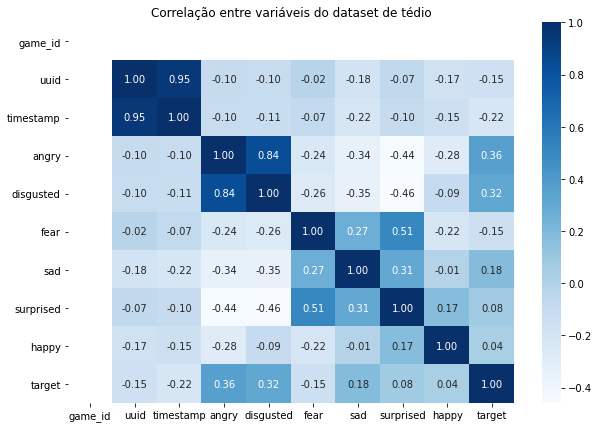

In [ ]:
plt.figure(figsize=(10, 7))
sns.heatmap(df_tratado.corr(),
            annot = True,
            fmt = '.2f',
            cmap='Blues')
plt.title('Correlação entre variáveis do dataset de tédio')
plt.show()

O valor mostrado para cada correlação vai de -1 — que indica uma correlação negativa perfeita — a +1 — uma correlação positiva perfeita. Vale lembrar que a função .corr() traz, por padrão, a correlação de Pearson, mostrando um relacionamento linear entre as variáveis. Em casos onde há um relacionamento não-linear, a matriz pode não ser uma boa medida.

## Feature Importance
O feature_importance_ retornar um array onde cada elemento dele é uma feature do seu modelo. Ele irá dizer, em proporções, quão importante aquela feature é para o modelo, onde quanto maior o valor, mais importante a feature é para o modelo.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf_RFC  = RandomForestClassifier()
clf_RFC.fit(X_treinamento, y_treinamento)

# Mostrando importância de cada feature
clf_RFC.feature_importances_

array([0.        , 0.02162371, 0.01026637, 0.24843513, 0.23071344,
       0.02383836, 0.18166186, 0.24852112, 0.03494001])

É retornado um array com quatro elementos. Se você somar todos eles, verá que o resultado será 1. Ao analisar esse array, podemos ver que a feature mais importante para o algoritmo Floresta Randômica foi a variável 'surprised'.

Text(0.5, 1.0, 'Importância de cada feature')

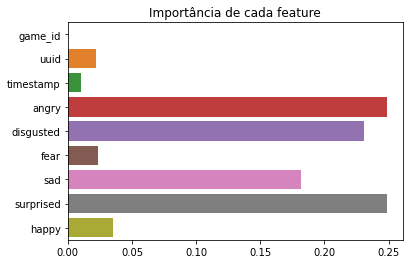

In [ ]:
importances = pd.Series(data=clf_RFC.feature_importances_, index=df_tratado.columns[0:9])
sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importância de cada feature')

As vezes, os valores mostrados pelo feature_importances_ pode ser enviesado dependendo dos parâmetros definidos na criação do objeto. Evite usar os parâmetros default do XXXX.

# Regressão Linear Simples e Multipla


*   [Linear Regression Example](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html)
*   [Implementando Regressão Linear Simples em Python](https://medium.com/data-hackers/implementando-regress%C3%A3o-linear-simples-em-python-91df53b920a8)
*   [Regressão Linear](https://www.kaggle.com/marilivb/4-regress-o-linear)
*   [https://www.datageeks.com.br/regressao-linear/](https://www.datageeks.com.br/regressao-linear/)



In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
# Criar um objeto de regressão linear
regr = linear_model.LinearRegression()

# Treinar o modelo usando os conjuntos de treinamento
regr.fit(X_treinamento, y_treinamento)

# Fazer predições usando o conjunto de teste
y_pred = regr.predict(X_teste)

In [ ]:
# Os coeficientes encontrados
print('Coeficientes: \n', regr.coef_)
# O Erro Médio Quadrático (EMQ)
print('Erro Médio Quadrático (EMQ): %.2f'
      % mean_squared_error(y_teste, y_pred))
# O coeficiente de determinação: 1 é a predição perfeita
print('Coeficiente de determinação: %.2f'
      % r2_score(y_teste, y_pred))

## Diagrama de Dispersão

In [ ]:
# plotar saídas
plt.scatter(X_teste.iloc[:,0].values, y_teste,  color='black')
plt.plot(X_teste, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

# Regressão Logística


*   [Logistic Regression using Python (scikit-learn)](https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a)
*   [Regressão Logística e Métricas de Classificação em Python](http://neylsoncrepalde.github.io/2019-11-25-regressao_logistica_python/)



In [ ]:
from sklearn.linear_model import LogisticRegression

clf_LR = LogisticRegression(random_state=0).fit(X_treinamento, y_treinamento)
clf_LR.predict(X_teste)

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
clf_LR.predict_proba(X_teste)

0.5625524769101595

In [ ]:
clf_LR.score(X_treinamento, y_treinamento)

0.5625524769101595

## Diagrama de Dispersão

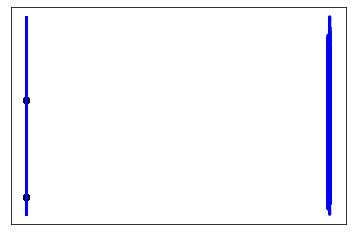

In [ ]:
# plotar saídas
plt.scatter(X_teste.iloc[:,0].values, y_teste,  color='black')
plt.plot(X_teste, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()